In [1]:
# Importing all the required Libraries-
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Data Gathering

In [2]:
# Creating dataframe-
df = pd.read_excel("aeroplane data.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
# Dropping unwanted features-
df.drop(["Date_of_Journey", "Route","Dep_Time","Arrival_Time", "Additional_Info"], axis=1, inplace=True)

In [5]:
# Checking Null Data-
df.isna().sum()

Airline        0
Source         0
Destination    0
Duration       0
Total_Stops    1
Price          0
dtype: int64

In [6]:
df["Airline"].value_counts().to_dict()

{'Jet Airways': 3849,
 'IndiGo': 2053,
 'Air India': 1752,
 'Multiple carriers': 1196,
 'SpiceJet': 818,
 'Vistara': 479,
 'Air Asia': 319,
 'GoAir': 194,
 'Multiple carriers Premium economy': 13,
 'Jet Airways Business': 6,
 'Vistara Premium economy': 3,
 'Trujet': 1}

In [7]:
df["Destination"].value_counts().to_dict()

{'Cochin': 4537,
 'Banglore': 2871,
 'Delhi': 1265,
 'New Delhi': 932,
 'Hyderabad': 697,
 'Kolkata': 381}

In [8]:
# Replacing object data with integers-
Airline = df["Airline"].value_counts().to_dict()
num=0
for i in Airline.keys():
    Airline[i] = num
    num+=1
df["Airline"].replace(Airline, inplace=True)

In [100]:
Airline

{'Jet Airways': 0,
 'IndiGo': 1,
 'Air India': 2,
 'Multiple carriers': 3,
 'SpiceJet': 4,
 'Vistara': 5,
 'Air Asia': 6,
 'GoAir': 7,
 'Multiple carriers Premium economy': 8,
 'Jet Airways Business': 9,
 'Vistara Premium economy': 10,
 'Trujet': 11}

In [9]:
# Replacing object data with integers-
Destination = df["Destination"].value_counts().to_dict()
num=0
for i in Destination.keys():
    Destination[i] = num
    num+=1
df["Destination"].replace(Destination, inplace=True)

In [10]:
# Replacing object data with integers-
Source = df['Source'].value_counts().to_dict()
num=0
for i in Source.keys():
    Source[i] = num
    num +=1
df['Source'].replace(Source,inplace=True)
df

,Airline,Source,Destination,Duration,Total_Stops,Price
0,1,2,3,2h 50m,non-stop,3897
1,2,1,1,7h 25m,2 stops,7662
2,0,0,0,19h,2 stops,13882
3,1,1,1,5h 25m,1 stop,6218
4,1,2,3,4h 45m,1 stop,13302
...,...,...,...,...,...,...
10678,6,1,1,2h 30m,non-stop,4107
10679,2,1,1,2h 35m,non-stop,4145
10680,0,2,2,3h,non-stop,7229
10681,5,2,3,2h 40m,non-stop,12648


In [11]:
df["Duration"]

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10683, dtype: object

In [12]:
df["Duration"] = df["Duration"].str.replace("h", "*60").str.replace(" ", "+").str.replace("m","*1").apply(eval)

In [13]:
df

,Airline,Source,Destination,Duration,Total_Stops,Price
0,1,2,3,170,non-stop,3897
1,2,1,1,445,2 stops,7662
2,0,0,0,1140,2 stops,13882
3,1,1,1,325,1 stop,6218
4,1,2,3,285,1 stop,13302
...,...,...,...,...,...,...
10678,6,1,1,150,non-stop,4107
10679,2,1,1,155,non-stop,4145
10680,0,2,2,180,non-stop,7229
10681,5,2,3,160,non-stop,12648


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Airline      10683 non-null  int64 
 1   Source       10683 non-null  int64 
 2   Destination  10683 non-null  int64 
 3   Duration     10683 non-null  int64 
 4   Total_Stops  10682 non-null  object
 5   Price        10683 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 500.9+ KB


In [15]:
df["Total_Stops"].mode()[0]

'1 stop'

In [16]:
# Replacing null values with mode of column-
df["Total_Stops"].fillna(df["Total_Stops"].mode()[0], inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Airline      10683 non-null  int64 
 1   Source       10683 non-null  int64 
 2   Destination  10683 non-null  int64 
 3   Duration     10683 non-null  int64 
 4   Total_Stops  10683 non-null  object
 5   Price        10683 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 500.9+ KB


In [18]:
df["Total_Stops"].value_counts().to_dict()

{'1 stop': 5626,
 'non-stop': 3491,
 '2 stops': 1520,
 '3 stops': 45,
 '4 stops': 1}

In [19]:
# Replacing object data with integers-
df["Total_Stops"].replace({'1 stop': 1,
 'non-stop': 0,
 '2 stops': 2,
 '3 stops': 3,
 '4 stops': 4},inplace=True)

In [20]:
# Data is ready for further procedures-
df

,Airline,Source,Destination,Duration,Total_Stops,Price
0,1,2,3,170,0,3897
1,2,1,1,445,2,7662
2,0,0,0,1140,2,13882
3,1,1,1,325,1,6218
4,1,2,3,285,1,13302
...,...,...,...,...,...,...
10678,6,1,1,150,0,4107
10679,2,1,1,155,0,4145
10680,0,2,2,180,0,7229
10681,5,2,3,160,0,12648


<AxesSubplot:>

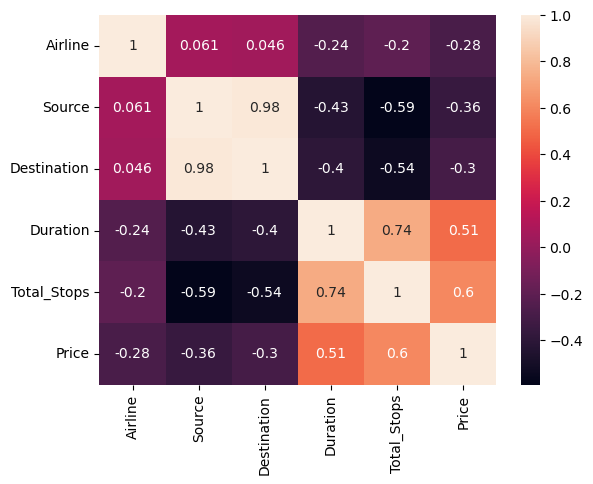

In [21]:
# Checking Linearity or corelation-
sns.heatmap(df.corr(),annot=True)

# Train-Test-Split

In [22]:
x = df.drop("Price", axis=1)
y = df["Price"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=33)

In [23]:
x_train

,Airline,Source,Destination,Duration,Total_Stops
7023,0,3,4,85,0
6078,1,1,1,150,0
6150,2,1,1,1540,1
1632,0,0,0,1090,2
7845,0,0,0,1040,1
...,...,...,...,...,...
57,5,4,5,135,0
578,0,0,0,660,1
5848,0,0,0,910,2
2439,3,0,0,665,1


In [24]:
y_train

7023     4050
6078     5224
6150     7893
1632    14237
7845    10262
        ...  
57       7414
578     14714
5848    11507
2439    12537
7188    13759
Name: Price, Length: 8546, dtype: int64

# Applying algoritms and Evaluating-

## 1) Linear Regression-

In [25]:
# Fitting the linear regression algorithm in training data-
lr_model = LinearRegression()
lr_model.fit(x_train, y_train) 

LinearRegression()

In [26]:
# Evaluation by using Testing Data-
y_pred= lr_model.predict(x_test)
mse= mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2_value = r2_score(y_test,y_pred)

print("mse is:", mse)
print("mae is:", mae)
print("R2 score is:", r2_value)

mse is: 13806340.09492629
mae is: 2474.980232491781
R2 score is: 0.4015735834318642


In [27]:
# Evaluation by using Training Data-
y_pred_train= lr_model.predict(x_train)
mse= mean_squared_error(y_train,y_pred_train)
mae = mean_absolute_error(y_train,y_pred_train)
r2_value = r2_score(y_train,y_pred_train)

print("mse is:", mse)
print("mae is:", mae)
print("R2 score is:", r2_value)

mse is: 12166972.608722568
mae is: 2410.909509045683
R2 score is: 0.4153411967659565


##### Training Accuracy- 0.41
##### Testing Accuracy - 0.40

In [28]:
# Fitting the linear regression algorithm with Normalization-
lr_model_norm = LinearRegression(normalize=True)
lr_model_norm.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [29]:
# Evaluation by using Testing Data-
y_pred= lr_model_norm.predict(x_test)
mse= mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2_value = r2_score(y_test,y_pred)

print("mse is:", mse)
print("mae is:", mae)
print("R2 score is:", r2_value)

mse is: 13806340.094926273
mae is: 2474.980232491786
R2 score is: 0.401573583431865


In [30]:
# Evaluation by using Training Data-
y_pred_train= lr_model_norm.predict(x_train)
mse= mean_squared_error(y_train,y_pred_train)
mae = mean_absolute_error(y_train,y_pred_train)
r2_value = r2_score(y_train,y_pred_train)

print("mse is:", mse)
print("mae is:", mae)
print("R2 score is:", r2_value)

mse is: 12166972.608722564
mae is: 2410.9095090456885
R2 score is: 0.4153411967659566


##### Training Accuracy- 0.41
##### Testing Accuracy - 0.40

##### Training Accuracy- 0.40
##### Testing Accuracy - 0.41

## KNN 

In [31]:
# Creating instance of KNNRegressor and fitting that into training data-
knn_reg = KNeighborsRegressor()   # Used default parameters
knn_reg.fit(x_train,y_train)

KNeighborsRegressor()

In [32]:
# Evaluation by using Testing Data-
y_pred= knn_reg.predict(x_test)
mse= mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2_value = r2_score(y_test,y_pred)

print("mse is:", mse)
print("mae is:", mae)
print("R2 score is:", r2_value)

mse is: 11256906.16707534
mae is: 1857.8364061768837
R2 score is: 0.5120770622127278


In [33]:
# Evaluation by using Training Data-
y_pred_train= knn_reg.predict(x_train)
mse= mean_squared_error(y_train,y_pred_train)
mae = mean_absolute_error(y_train,y_pred_train)
r2_value = r2_score(y_train,y_pred_train)

print("mse is:", mse)
print("mae is:", mae)
print("R2 score is:", r2_value)

mse is: 7547957.543664871
mae is: 1643.285186051954
R2 score is: 0.6372984499712948


##### Training Accuracy- 0.51
##### Testing Accuracy - 0.63

### Scaling

#### Normalization-

In [34]:
# Converting to normalized scale-
normal_scaler = MinMaxScaler()
normal_scaler.fit(x_train)
array = normal_scaler.transform(x_train)
x_train_norm = pd.DataFrame(array,columns = x_train.columns)
x_train_norm

,Airline,Source,Destination,Duration,Total_Stops
0,0.000000,0.75,0.8,0.028021,0.00
1,0.090909,0.25,0.2,0.050788,0.00
2,0.181818,0.25,0.2,0.537653,0.25
3,0.000000,0.00,0.0,0.380035,0.50
4,0.000000,0.00,0.0,0.362522,0.25
...,...,...,...,...,...
8541,0.454545,1.00,1.0,0.045534,0.00
8542,0.000000,0.00,0.0,0.229422,0.25
8543,0.000000,0.00,0.0,0.316988,0.50
8544,0.272727,0.00,0.0,0.231173,0.25


In [35]:
array = normal_scaler.transform(x_test)
x_test_norm = pd.DataFrame(array,columns = x_test.columns)
x_test_norm

,Airline,Source,Destination,Duration,Total_Stops
0,0.000000,0.25,0.2,0.357268,0.25
1,0.181818,0.00,0.0,0.551664,0.50
2,0.000000,0.00,0.0,0.416813,0.50
3,0.090909,0.25,0.2,0.056042,0.00
4,0.000000,0.25,0.2,0.376532,0.25
...,...,...,...,...,...
2132,0.090909,0.00,0.0,0.197898,0.25
2133,0.000000,0.50,0.6,0.304729,0.25
2134,0.000000,0.00,0.0,0.281961,0.50
2135,0.181818,0.00,0.0,0.495622,0.25


In [73]:
knn_norm = KNeighborsRegressor()
knn_norm.fit(x_train_norm,y_train)

KNeighborsRegressor()

In [74]:
# Evaluation by using Testing Data-
y_pred_norm= knn_norm.predict(x_test_norm)
mse= mean_squared_error(y_test,y_pred_norm)
mae = mean_absolute_error(y_test,y_pred)
r2_value = r2_score(y_test,y_pred)

print("mse is:", mse)
print("mae is:", mae)
print("R2 score is:", r2_value)

mse is: 9914077.29525503
mae is: 1823.3082142544513
R2 score is: 0.6436751076525782


In [75]:
# Evaluation by using Training Data-
y_pred_train= knn_norm.predict(x_train_norm)
mse= mean_squared_error(y_train,y_pred_train)
mae = mean_absolute_error(y_train,y_pred_train)
r2_value = r2_score(y_train,y_pred_train)

print("mse is:", mse)
print("mae is:", mae)
print("R2 score is:", r2_value)

mse is: 6862642.236882753
mae is: 1612.7086824245262
R2 score is: 0.6702298652038694


##### Training Accuracy- 067
##### Testing Accuracy - 0.64

### Standardzation

In [38]:
std_scalar = StandardScaler()
std_scalar.fit(x_train)
array = std_scalar.transform(x_train)
x_train_std = pd.DataFrame(array, columns=x_train.columns)
x_train_std

,Airline,Source,Destination,Duration,Total_Stops
0,-0.930415,1.824565,1.997481,-1.102688,-1.225676
1,-0.387032,-0.008149,-0.138286,-0.974992,-1.225676
2,0.156351,-0.008149,-0.138286,1.755747,0.257352
3,-0.930415,-0.924506,-0.850208,0.871695,1.740380
4,-0.930415,-0.924506,-0.850208,0.773467,0.257352
...,...,...,...,...,...
8541,1.786501,2.740921,2.709403,-1.004460,-1.225676
8542,-0.930415,-0.924506,-0.850208,0.026934,0.257352
8543,-0.930415,-0.924506,-0.850208,0.518074,1.740380
8544,0.699735,-0.924506,-0.850208,0.036757,0.257352


In [39]:
array = std_scalar.transform(x_test)
x_test_std = pd.DataFrame(array, columns = x_train.columns)
x_test_std

,Airline,Source,Destination,Duration,Total_Stops
0,-0.930415,-0.008149,-0.138286,0.743999,0.257352
1,0.156351,-0.924506,-0.850208,1.834330,1.740380
2,-0.930415,-0.924506,-0.850208,1.077974,1.740380
3,-0.387032,-0.008149,-0.138286,-0.945523,-1.225676
4,-0.930415,-0.008149,-0.138286,0.852049,0.257352
...,...,...,...,...,...
2132,-0.387032,-0.924506,-0.850208,-0.149876,0.257352
2133,-0.930415,0.908208,1.285559,0.449314,0.257352
2134,-0.930415,-0.924506,-0.850208,0.321618,1.740380
2135,0.156351,-0.924506,-0.850208,1.520000,0.257352


In [40]:
knn = KNeighborsRegressor()
knn.fit(x_train_std,y_train)

KNeighborsRegressor()

In [41]:
# Evaluation by using Testing Data-
y_pred= knn.predict(x_test_std)
mse= mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2_value = r2_score(y_test,y_pred)

print("mse is:", mse)
print("mae is:", mae)
print("R2 score is:", r2_value)

mse is: 9946291.571867103
mae is: 1795.2714085166122
R2 score is: 0.5688847600037295


In [42]:
# Evaluation by using Training Data-
y_pred_train= knn.predict(x_train_std)
mse= mean_squared_error(y_train,y_pred_train)
mae = mean_absolute_error(y_train,y_pred_train)
r2_value = r2_score(y_train,y_pred_train)

print("mse is:", mse)
print("mae is:", mae)
print("R2 score is:", r2_value)

mse is: 6987184.694879475
mae is: 1616.9080037444419
R2 score is: 0.6642452339578034


##### Training Accuracy- 0.66
##### Testing Accuracy - 0.56

### Hyperparameter Tuning in KNN Normalization-

In [76]:
knn_reg =KNeighborsRegressor()

hyperparameters = {"n_neighbors": np.arange(3,30), "p":[1,2]}

gscv = GridSearchCV(knn_reg,hyperparameters,cv=5)
gscv.fit(x_train_norm,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2]})

In [77]:
# To get best hyperparameters-
gscv.best_estimator_

KNeighborsRegressor(n_neighbors=10, p=1)

In [78]:
knn_reg = KNeighborsRegressor(n_neighbors=10, p=1)
knn_reg.fit(x_train_norm,y_train)

KNeighborsRegressor(n_neighbors=10, p=1)

In [80]:
# Evaluation by using Testing Data-
y_pred= knn_reg.predict(x_test_norm)
mse= mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2_value = r2_score(y_test,y_pred)

print("mse is:", mse)
print("mae is:", mae)
print("R2 score is:", r2_value)

mse is: 9728068.76689752
mae is: 1765.7822180627045
R2 score is: 0.5783434789903337


In [81]:
# Evaluation by using Training Data-
y_pred_train= knn_reg.predict(x_train_norm)
mse= mean_squared_error(y_train,y_pred_train)
mae = mean_absolute_error(y_train,y_pred_train)
r2_value = r2_score(y_train,y_pred_train)

print("mse is:", mse)
print("mae is:", mae)
print("R2 score is:", r2_value)

mse is: 7125906.957741634
mae is: 1629.2397612918323
R2 score is: 0.657579221401092


##### Training Accuracy- 0.65
##### Testing Accuracy - 0.57

### Hyperparameter Tuning in KNN Standardization-

In [43]:
knn_reg =KNeighborsRegressor()

hyperparameters = {"n_neighbors": np.arange(3,30), "p":[1,2]}

gscv = GridSearchCV(knn_reg,hyperparameters,cv=5)
gscv.fit(x_train_std,y_train)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2]})

In [44]:
# To get best hyperparameters-
gscv.best_estimator_

KNeighborsRegressor(n_neighbors=10, p=1)

In [45]:
knn_reg = KNeighborsRegressor(n_neighbors=10, p=1)
knn_reg.fit(x_train_std,y_train)

KNeighborsRegressor(n_neighbors=10, p=1)

In [46]:
# Evaluation by using Testing Data-
y_pred= knn_reg.predict(x_test_std)
mse= mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2_value = r2_score(y_test,y_pred)

print("mse is:", mse)
print("mae is:", mae)
print("R2 score is:", r2_value)

mse is: 9713770.700131025
mae is: 1764.5998128217127
R2 score is: 0.5789632189648741


In [47]:
# Evaluation by using Training Data-
y_pred_train= knn_reg.predict(x_train_std)
mse= mean_squared_error(y_train,y_pred_train)
mae = mean_absolute_error(y_train,y_pred_train)
r2_value = r2_score(y_train,y_pred_train)

print("mse is:", mse)
print("mae is:", mae)
print("R2 score is:", r2_value)

mse is: 7125390.083159373
mae is: 1630.979031125673
R2 score is: 0.6576040587443166


##### Training Accuracy- 0.657
##### Testing Accuracy - 0.578

## Decision Tree

In [48]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [49]:
# Evaluation by using Testing Data-
y_pred= dt_reg.predict(x_test)
mse= mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2_value = r2_score(y_test,y_pred)

print("mse is:", mse)
print("mae is:", mae)
print("R2 score is:", r2_value)

mse is: 9129200.535196727
mae is: 1786.8376903374274
R2 score is: 0.6043010149795349


In [50]:
# Evaluation by using Training Data-
y_pred_train= dt_reg.predict(x_train)
mse= mean_squared_error(y_train,y_pred_train)
mae = mean_absolute_error(y_train,y_pred_train)
r2_value = r2_score(y_train,y_pred_train)

print("mse is:", mse)
print("mae is:", mae)
print("R2 score is:", r2_value)

mse is: 5220689.962844879
mae is: 1416.981676833268
R2 score is: 0.7491304991066846


In [51]:
from sklearn.tree import plot_tree

##### Training Accuracy- 0.75
##### Testing Accuracy - 0.60

In [53]:
import warnings
warnings.simplefilter("ignore")

### Hyperparameter Tuning for Decision Tree-

In [55]:
from sklearn.model_selection import RandomizedSearchCV

In [56]:
dt_reg = DecisionTreeRegressor()

hyperparameters ={ "criterion" :['mse','mae'],
     'max_depth': np.arange(3,14),
     'min_samples_split' : np.arange(2,20),
     'min_samples_leaf':np.arange(2,15)}

rscv_dt_reg = RandomizedSearchCV(dt_reg,hyperparameters, cv = 5)
rscv_dt_reg.fit(x_train, y_train)
rscv_dt_reg.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=9, min_samples_leaf=6,
                      min_samples_split=11)

In [58]:
dt_reg = rscv_dt_reg.best_estimator_
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=9, min_samples_leaf=6,
                      min_samples_split=11)

In [59]:
# Testing Data Evaluation
y_pred = dt_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)
print('*'*80)

rmse = np.sqrt(mse)
print("RMSE :",rmse)
print('*'*80)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)
print('*'*80)

r2_value = r2_score(y_test, y_pred)
print("R-Squared Value is :",r2_value)

MSE : 10042930.094982795
********************************************************************************
RMSE : 3169.0582347099266
********************************************************************************
MAE : 1833.8650383797615
********************************************************************************
R-Squared Value is : 0.5646960289792189


In [60]:
# Train Data Evaluation
y_pred_train = dt_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)
print('*'*80)

rmse = np.sqrt(mse)
print("RMSE :",rmse)
print('*'*80)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)
print('*'*80)

r2_value = r2_score(y_train, y_pred_train)
print("R-Squared Value is :",r2_value)

MSE : 7775132.6310008485
********************************************************************************
RMSE : 2788.392481520643
********************************************************************************
MAE : 1765.3295620356928
********************************************************************************
R-Squared Value is : 0.6263820191583231


##### Training Accuracy- 0.62
##### Testing Accuracy - 0.56

## Pruning-

In [63]:
dt_model = DecisionTreeRegressor(random_state = 10)
dt_model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=10)

In [64]:
result = dt_model.cost_complexity_pruning_path(x_train, y_train)
ccp_alpha_list = result["ccp_alphas"]

In [66]:
train_accuracy_list = []
test_accuracy_list = []

for ccp_alpha in ccp_alpha_list:
    dt_reg_model = DecisionTreeRegressor(random_state=10,ccp_alpha = ccp_alpha)
    dt_reg_model.fit(x_train,y_train)
    train_accuracy_list.append(dt_reg_model.score(x_train,y_train))
    test_accuracy_list.append(dt_reg_model.score(x_test,y_test))
    
print("Training accuracy list is: \n", train_accuracy_list)
print("*"*50)
print("Testing accuracy list is: \n", test_accuracy_list)

Training accuracy list is: 
 [0.7491304991066846, 0.7491304991066846, 0.7491304991066846, 0.7491304991064491, 0.7491304968334089, 0.7491304928903775, 0.74913048842864, 0.7491304835961932, 0.7491304775601267, 0.7491304710509664, 0.7491304642801089, 0.749130457490004, 0.7491304500668949, 0.7491304421695917, 0.7491304320334539, 0.7491304170659852, 0.7491303997103944, 0.7491303779900994, 0.7491303445144175, 0.74913030513507, 0.7491302649086791, 0.7491302175248593, 0.7491301673113364, 0.7491301167302795, 0.7491300638304366, 0.7491300080366962, 0.7491299483838014, 0.7491298753973453, 0.749129800495222, 0.7491297238406804, 0.7491296450823633, 0.7491294777039539, 0.7491293874003944, 0.7491292923741033, 0.7491291948252377, 0.7491290927718841, 0.749128986972198, 0.7491288734429127, 0.74912875823881, 0.7491286352678099, 0.7491285112838029, 0.7491283720161195, 0.7491282219954709, 0.7491280359731223, 0.7491278211336212, 0.7491275657971336, 0.7491270222917312, 0.7491267415537038, 0.7491264570398652,

In [67]:
np.where(test_accuracy_list==np.max(test_accuracy_list))

(array([716], dtype=int64),)

In [68]:
decision_tree_model = DecisionTreeRegressor(random_state=10,ccp_alpha=ccp_alpha_list[716])
decision_tree_model.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=14296.654333956772, random_state=10)

In [69]:
# Testing Data Evaluation
y_pred = decision_tree_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)
print('*'*80)

rmse = np.sqrt(mse)
print("RMSE :",rmse)
print('*'*80)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)
print('*'*80)

r2_value = r2_score(y_test, y_pred)
print("R-Squared Value is :",r2_value)

MSE : 8220797.932432807
********************************************************************************
RMSE : 2867.1933894372746
********************************************************************************
MAE : 1823.3082142544513
********************************************************************************
R-Squared Value is : 0.6436751076525782


In [70]:
# Testing Data Evaluation
y_pred_train = decision_tree_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)
print('*'*80)

rmse = np.sqrt(mse)
print("RMSE :",rmse)
print('*'*80)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)
print('*'*80)

r2_value = r2_score(y_train, y_pred_train)
print("R-Squared Value is :",r2_value)

MSE : 7019879.134724692
********************************************************************************
RMSE : 2649.505450970934
********************************************************************************
MAE : 1781.301897995761
********************************************************************************
R-Squared Value is : 0.6626741700056574


##### Training Accuracy- 0.66
##### Testing Accuracy - 0.64

In [71]:
decision_tree_model.get_depth()
decision_tree_model.feature_importances_

array([0.21109675, 0.00360832, 0.03971377, 0.70744362, 0.03813754])

### Random Forest-

In [82]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
rf_regres = RandomForestRegressor()
rf_regres.fit(x_train,y_train)

RandomForestRegressor()

In [117]:
#Training Data Evaluation

y_pred_train = rf_regres.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE :",mse)

print("*"*80)
rmse = np.sqrt(mse)
print("RMSE :",rmse)

print("*"*80)
mae = mean_absolute_error(y_train,y_pred_train)
print("MAE:",mae)
print("*"*80)
r2_value = r2_score(y_train,y_pred_train)
print("R-Squared value:",r2_value)

MSE : 5371096.067832353
********************************************************************************
RMSE : 2317.562527275662
********************************************************************************
MAE: 1462.8964664721577
********************************************************************************
R-Squared value: 0.7419030435868104


In [118]:
#Test Data Evaluation

y_pred = rf_regres.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE :",mse)

print("*"*80)
rmse = np.sqrt(mse)
print("RMSE :",rmse)

print("*"*80)
mae = mean_absolute_error(y_test,y_pred)
print("MAE:",mae)
print("*"*80)
r2_value = r2_score(y_test,y_pred)
print("R-Squared value:",r2_value)

MSE : 8450575.58431165
********************************************************************************
RMSE : 2906.9873725751972
********************************************************************************
MAE: 1736.5279867773202
********************************************************************************
R-Squared value: 0.6337155516894574


##### Training Accuracy- 0.74
##### Testing Accuracy - 0.63

#### Hyperparameter Tuning on Random Forest-

In [94]:
rf_reg = RandomForestRegressor()
hyperparameters = {'n_estimators':np.arange(10,100),
                  'criterion':['mse','mae'],
                  'max_depth':np.arange(3,8),
                  'min_samples_split':np.arange(4,20),
                  'min_samples_leaf':np.arange(3,10),
                  'random_state':[11]}

rscv_rf_reg = RandomizedSearchCV(rf_reg,hyperparameters, cv=5)
rscv_rf_reg.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99]),
                                        'random_state': [11]})

In [95]:
rscv_rf_reg.best_estimator_

RandomForestRegressor(criterion='mse', max_depth=7, min_samples_leaf=6,
                      min_samples_split=17, n_estimators=72, random_state=11)

In [96]:
rf_reg = rscv_rf_reg.best_estimator_
rf_reg.fit(x_train,y_train)

RandomForestRegressor(criterion='mse', max_depth=7, min_samples_leaf=6,
                      min_samples_split=17, n_estimators=72, random_state=11)

In [97]:
#Test Data Evaluation

y_pred = rf_reg.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE :",mse)

print("*"*80)
rmse = np.sqrt(mse)
print("RMSE :",rmse)

print("*"*80)
mae = mean_absolute_error(y_test,y_pred)
print("MAE:",mae)
print("*"*80)
r2_value = r2_score(y_test,y_pred)
print("R-Squared value:",r2_value)

MSE : 9342024.6599027
********************************************************************************
RMSE : 3056.4725845167823
********************************************************************************
MAE: 1864.6579963707368
********************************************************************************
R-Squared value: 0.5950762981152988


In [98]:
#Training Data Evaluation

y_pred_train = rf_reg.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE :",mse)

print("*"*80)
rmse = np.sqrt(mse)
print("RMSE :",rmse)

print("*"*80)
mae = mean_absolute_error(y_train,y_pred_train)
print("MAE:",mae)
print("*"*80)
r2_value = r2_score(y_train,y_pred_train)
print("R-Squared value:",r2_value)

MSE : 8138037.694735378
********************************************************************************
RMSE : 2852.72460898969
********************************************************************************
MAE: 1816.5339283127419
********************************************************************************
R-Squared value: 0.608943363950166


In [99]:
x.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops'], dtype='object')

In [110]:
json_data = {"Airline":Airline,'Source':Source,'Destination':Destination,'Total_Stops':{'1 stop': 1,'non-stop': 0,'2 stops': 2,'3 stops': 3, '4 stops': 4},'columns':list(x.columns)}

In [111]:
json_data

{'Airline': {'Jet Airways': 0,
  'IndiGo': 1,
  'Air India': 2,
  'Multiple carriers': 3,
  'SpiceJet': 4,
  'Vistara': 5,
  'Air Asia': 6,
  'GoAir': 7,
  'Multiple carriers Premium economy': 8,
  'Jet Airways Business': 9,
  'Vistara Premium economy': 10,
  'Trujet': 11},
 'Source': {'Delhi': 0,
  'Kolkata': 1,
  'Banglore': 2,
  'Mumbai': 3,
  'Chennai': 4},
 'Destination': {'Cochin': 0,
  'Banglore': 1,
  'Delhi': 2,
  'New Delhi': 3,
  'Hyderabad': 4,
  'Kolkata': 5},
 'Total_Stops': {'1 stop': 1,
  'non-stop': 0,
  '2 stops': 2,
  '3 stops': 3,
  '4 stops': 4},
 'columns': ['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']}

In [109]:
list(x.columns)

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']

In [113]:
import json
with open("json_data.json","w") as f:
    json.dump(json_data,f)

In [119]:
import pickle
with open("rf_model.pkl","wb") as f:
    pickle.dump(rf_regres,f)